In [2]:
import numpy as np
from matplotlib import pyplot as plt
import time
%matplotlib inline

## Collect data

In [3]:
a = 0.5
b = 0.15

r_u = 0.2
r_e = 0.1

data = {'y0': [], 
        'y1': [], 
        'u1': [],
        'k': []}
        
y1 = 0

for k in range(1000):
    
    e = np.random.normal(0, np.sqrt(r_e))
    u1 = np.random.normal(0, np.sqrt(r_u))
        
    y0 = a*y1 + b*u1 + e
    
    data['y0'].append(y0)
    data['y1'].append(y1)
    data['u1'].append(u1)
    data['k'].append(k)
    
    y1 = y0
    

Text(0, 0.5, 'y')

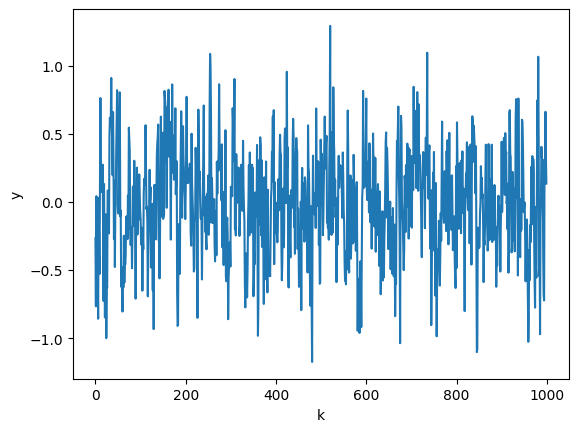

In [4]:
f, ax = plt.subplots(1, 1)
ax.plot(data['k'], data['y0'])
ax.set_xlabel('k')
ax.set_ylabel('y')

## Regression 

In [5]:
t_start = time.time()

XX_T = np.zeros((2,2))
Xy = np.zeros((2,1))

for k in range(len(data['k'])):
    y0 = data['y0'][k]
    y1 = data['y1'][k]
    u1 = data['u1'][k]
    
    X = np.array([[y1],
                  [u1]])
    
    XX_T += X.dot(X.T)
    
    
    Xy += X*y0 

sol = np.linalg.inv(XX_T).dot(Xy)

print('solve time', time.time() - t_start)

print('est a = ', np.round(sol[0,0],5), ', true a = ', a)
print('est b = ', np.round(sol[1,0],5), ', true b = ', b)


solve time 0.016071081161499023
est a =  0.50356 , true a =  0.5
est b =  0.14109 , true b =  0.15


In [5]:
t_start = time.time()

X = np.vstack([data['y1'],  data['u1']])
y = np.array([data['y0']]).T

XX_T = X.dot(X.T)
Xy = X.dot(y)

sol = np.linalg.inv(XX_T).dot(Xy)

print('solve time', time.time() - t_start)

print('est a = ', np.round(sol[0,0],5), ', true a = ', a)
print('est b = ', np.round(sol[1,0],5), ', true b = ', b)

solve time 0.0014615058898925781
est a =  0.4916 , true a =  0.5
est b =  0.15706 , true b =  0.15


In [6]:
t_start = time.time()

X = np.vstack([data['y1'],  data['u1']])
y = np.array([data['y0']]).T

sol = np.linalg.pinv(X.T).dot(y)

print('solve time', time.time() - t_start)
print('est a = ', np.round(sol[0,0],5), ', true a = ', a)
print('est b = ', np.round(sol[1,0],5), ', true b = ', b)

solve time 0.0011715888977050781
est a =  0.4916 , true a =  0.5
est b =  0.15706 , true b =  0.15
